### Exercise 1: Loading and cleaning our data.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
retail = pd.read_csv('online_retail_II.csv')
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [66]:
retail.rename(index = str, columns = {
    'Invoice' : 'invoice', 
    'StockCode' : 'stock_code', 
    'Quantity' : 'quantity', 
    'InvoiceDate' : 'date', 
    'Price' : 'unit_price', 
    'Country' : 'country', 
    'Description' : 'desc', 
    'Customer ID' : 'cust_id'
}, inplace = True)

retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [67]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 0 to 525460
Data columns (total 8 columns):
invoice       525461 non-null object
stock_code    525461 non-null object
desc          522533 non-null object
quantity      525461 non-null int64
date          525461 non-null object
unit_price    525461 non-null float64
cust_id       417534 non-null float64
country       525461 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [68]:
retail.isnull().sum().sort_values(ascending = False)

cust_id       107927
desc            2928
country            0
unit_price         0
date               0
quantity           0
stock_code         0
invoice            0
dtype: int64

In [69]:
retail.describe()

,quantity,unit_price,cust_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [70]:
retail.loc[retail['unit_price'] == 25111.090000]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
241824,C512770,M,Manual,-1,17/06/2010 16:52,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,17/06/2010 16:53,25111.09,NaN,United Kingdom


In [71]:
retail.loc[retail['unit_price'] == -53594.360000]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


In [72]:
(retail['unit_price'] <= 0).sum()

3690

In [73]:
(retail['quantity'] <= 0).sum()

12326

In [74]:
((retail['unit_price'] <= 0) & (retail['quantity'] <= 0) & (retail['cust_id'].isnull())).sum()

2121

In [75]:
null_retail = retail[retail.isnull().any(axis=1)]
null_retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
263,489464,21733,85123a mixed,-96,01/12/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,01/12/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01/12/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,01/12/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,01/12/2009 11:49,0.55,NaN,United Kingdom


In [76]:
new_retail = retail.dropna()

In [77]:
new_retail = new_retail[(new_retail['unit_price'] > 0) & (new_retail['quantity'] > 0)]

In [78]:
new_retail.describe()

,quantity,unit_price,cust_id
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


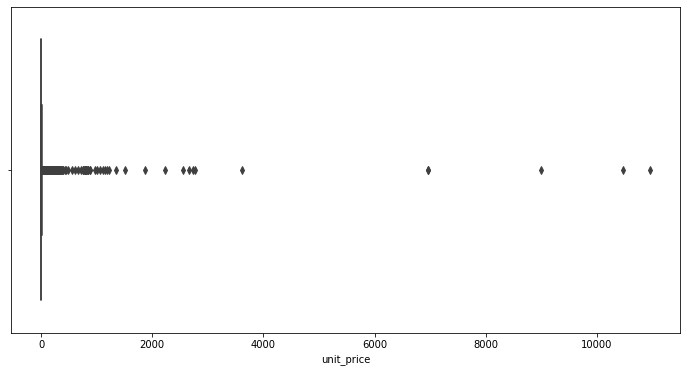

In [79]:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(new_retail.unit_price)

In [80]:
new_retail = new_retail[retail.unit_price < 6000]

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [81]:
new_retail.describe()

,quantity,unit_price,cust_id
count,407659.000000,407659.000000,407659.000000
mean,13.585740,3.185750,15368.593562
std,96.841331,14.494341,1679.761725
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,3610.500000,18287.000000


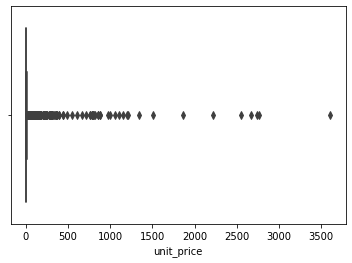

In [82]:
up_new = sns.boxplot(new_retail.unit_price)

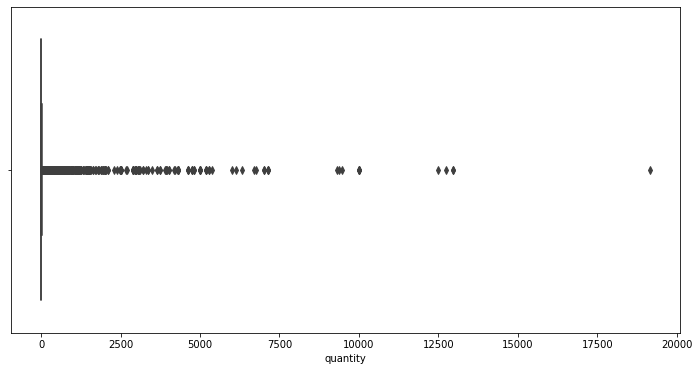

In [83]:
plt.subplots(figsize = (12, 6))
q = sns.boxplot(new_retail.quantity)

In [84]:
new_retail = new_retail[retail.quantity < 15000]

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [85]:
new_retail.describe()

,quantity,unit_price,cust_id
count,407658.000000,407658.000000,407658.000000
mean,13.538792,3.185757,15368.597160
std,92.085647,14.494358,1679.762214
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,12960.000000,3610.500000,18287.000000


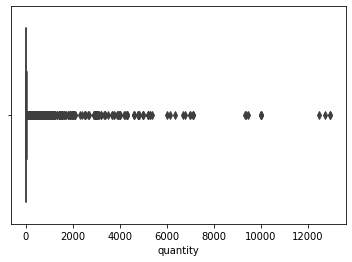

In [86]:
q_new = sns.boxplot(new_retail.quantity)

In [87]:
new_retail[(new_retail.desc.isnull()) & (new_retail.cust_id.isnull())]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country


In [88]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407658 entries, 0 to 525460
Data columns (total 8 columns):
invoice       407658 non-null object
stock_code    407658 non-null object
desc          407658 non-null object
quantity      407658 non-null int64
date          407658 non-null object
unit_price    407658 non-null float64
cust_id       407658 non-null float64
country       407658 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ MB


In [89]:
retail = new_retail
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


### Exercise 2: Preparing our data

In [90]:
retail.desc = retail.desc.str.lower()
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [91]:
retail['date'] = pd.to_datetime(retail.date, format = '%d/%m/%Y %H:%M')
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [92]:
retail.insert(loc = 4, column = 'year_month', value = retail.date.map(lambda x: 100 * x.year + x.month))
retail.insert(loc = 5, column = 'year', value = retail.date.dt.year)
retail.insert(loc = 6, column = 'month', value = retail.date.dt.month)
retail.insert(loc = 7, column = 'day', value = retail.date.dt.day)
retail.insert(loc = 8, column ='hour', value = retail.date.dt.hour)
retail.insert(loc = 9, column='day_of_week', value=(retail.date.dt.dayofweek)+1)
retail.head()

,invoice,stock_code,desc,quantity,year_month,year,month,day,hour,day_of_week,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,200912,2009,12,1,7,2,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [93]:
retail.insert(loc = 11, column = 'spent', value = (retail['quantity'] * retail['unit_price']))
retail.head()

,invoice,stock_code,desc,quantity,year_month,year,month,day,hour,day_of_week,date,spent,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,83.4,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,200912,2009,12,1,7,2,2009-12-01 07:45:00,100.8,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,30.0,1.25,13085.0,United Kingdom


In [94]:
retail = retail[['invoice', 'country', 'cust_id', 'stock_code', 'desc','quantity', 'unit_price', 'date', 'spent', 
                 'year_month', 'year', 'month', 'day', 'day_of_week', 'hour']]
retail.head()

,invoice,country,cust_id,stock_code,desc,quantity,unit_price,date,spent,year_month,year,month,day,day_of_week,hour
0,489434,United Kingdom,13085.0,85048,15cm christmas glass ball 20 lights,12,6.95,2009-12-01 07:45:00,83.4,200912,2009,12,1,2,7
1,489434,United Kingdom,13085.0,79323P,pink cherry lights,12,6.75,2009-12-01 07:45:00,81.0,200912,2009,12,1,2,7
2,489434,United Kingdom,13085.0,79323W,white cherry lights,12,6.75,2009-12-01 07:45:00,81.0,200912,2009,12,1,2,7
3,489434,United Kingdom,13085.0,22041,"record frame 7"" single size",48,2.10,2009-12-01 07:45:00,100.8,200912,2009,12,1,2,7
4,489434,United Kingdom,13085.0,21232,strawberry ceramic trinket box,24,1.25,2009-12-01 07:45:00,30.0,200912,2009,12,1,2,7


### Exercise 3: Exploratory Data Analysis

In [95]:
#orders made by each customer

ord_cust = retail.groupby(by = ['cust_id', 'country'], as_index = False)['invoice'].count()
ord_cust.head(10)

,cust_id,country,invoice
0,12346.0,United Kingdom,33
1,12347.0,Iceland,71
2,12348.0,Finland,20
3,12349.0,Italy,102
4,12351.0,Unspecified,21
5,12352.0,Norway,18
6,12353.0,Bahrain,20
7,12355.0,Bahrain,22
8,12356.0,Portugal,84
9,12357.0,Switzerland,165


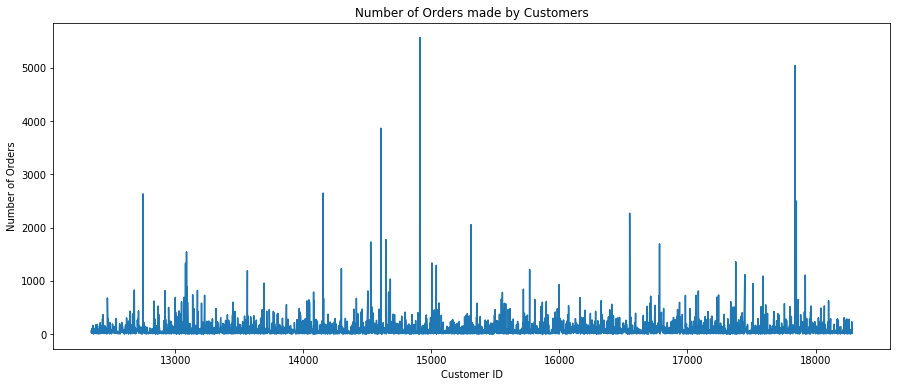

In [96]:
plt.subplots(figsize = (15, 6))
oc = plt.plot(ord_cust.cust_id, ord_cust.invoice)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders made by Customers')
plt.show()

In [97]:
ord_cust.describe()

,cust_id,invoice
count,4315.000000,4315.000000
mean,15346.442642,94.474623
std,1702.986420,201.977000
min,12346.000000,1.000000
25%,13878.500000,18.000000
50%,15346.000000,44.000000
75%,16833.500000,102.000000
max,18287.000000,5570.000000


In [98]:
# 5 customers who ordered the most number of times
ord_cust.sort_values(by = 'invoice', ascending = False).head()

,cust_id,country,invoice
1844,14911.0,EIRE,5570
3992,17841.0,United Kingdom,5043
1610,14606.0,United Kingdom,3866
1273,14156.0,EIRE,2648
256,12748.0,United Kingdom,2633


In [99]:
ord_cust.sort_values(by = 'invoice', ascending = False).tail()

,cust_id,country,invoice
1233,14095.0,United Kingdom,1
1239,14106.0,United Kingdom,1
2752,16165.0,United Kingdom,1
3655,17378.0,United Kingdom,1
1427,14366.0,United Kingdom,1


In [100]:
# money spent 
spent_cust = retail.groupby(by = ['cust_id', 'country', 'quantity', 'unit_price'], as_index = False)['spent'].sum()
spent_cust.head()

,cust_id,country,quantity,unit_price,spent
0,12346.0,United Kingdom,1,1.00,1.00
1,12346.0,United Kingdom,1,3.25,3.25
2,12346.0,United Kingdom,1,5.95,23.80
3,12346.0,United Kingdom,1,7.49,142.31
4,12346.0,United Kingdom,5,4.50,157.50


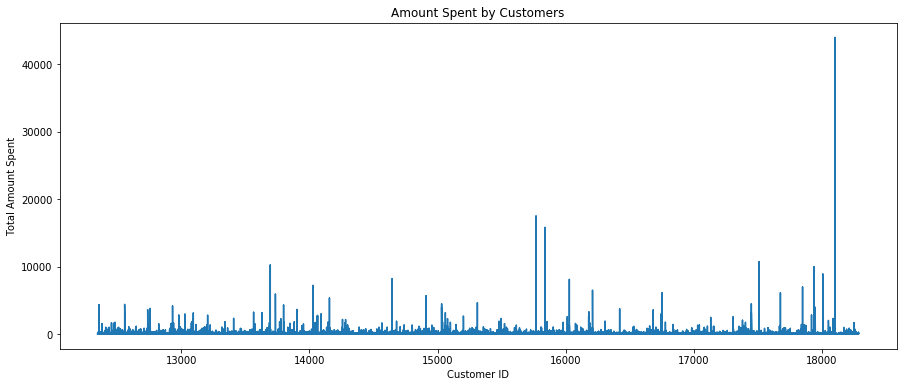

In [102]:
plt.subplots(figsize = (15, 6))
sc = plt.plot(spent_cust.cust_id, spent_cust.spent)
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent by Customers')
plt.show()

In [103]:
spent_cust.sort_values(by = 'spent', ascending = False).head()

,cust_id,country,quantity,unit_price,spent
144871,18102.0,United Kingdom,300,4.58,43968.0
144915,18102.0,United Kingdom,600,3.00,18000.0
82744,15769.0,United Kingdom,200,1.65,17490.0
84312,15838.0,United Kingdom,9360,1.69,15818.4
144912,18102.0,United Kingdom,576,3.00,13824.0


In [104]:
spent_cust.sort_values(by = 'spent', ascending = False).tail()

,cust_id,country,quantity,unit_price,spent
44358,14249.0,United Kingdom,1,0.001,0.001
27696,13583.0,United Kingdom,1,0.001,0.001
48967,14459.0,United Kingdom,1,0.001,0.001
124745,17350.0,United Kingdom,1,0.001,0.001
106656,16705.0,United Kingdom,1,0.001,0.001


In [167]:
retail.tail()

,invoice,country,cust_id,stock_code,desc,quantity,unit_price,date,spent,year_month,year,month,day,day_of_week,hour
525456,538171,United Kingdom,17530.0,22271,feltcraft doll rosie,2,2.95,2010-12-09 20:01:00,5.90,201012,2010,12,9,4,20
525457,538171,United Kingdom,17530.0,22750,feltcraft princess lola doll,1,3.75,2010-12-09 20:01:00,3.75,201012,2010,12,9,4,20
525458,538171,United Kingdom,17530.0,22751,feltcraft princess olivia doll,1,3.75,2010-12-09 20:01:00,3.75,201012,2010,12,9,4,20
525459,538171,United Kingdom,17530.0,20970,pink floral feltcraft shoulder bag,2,3.75,2010-12-09 20:01:00,7.50,201012,2010,12,9,4,20
525460,538171,United Kingdom,17530.0,21931,jumbo storage bag suki,2,1.95,2010-12-09 20:01:00,3.90,201012,2010,12,9,4,20


In [168]:
retail.head()

,invoice,country,cust_id,stock_code,desc,quantity,unit_price,date,spent,year_month,year,month,day,day_of_week,hour
0,489434,United Kingdom,13085.0,85048,15cm christmas glass ball 20 lights,12,6.95,2009-12-01 07:45:00,83.4,200912,2009,12,1,2,7
1,489434,United Kingdom,13085.0,79323P,pink cherry lights,12,6.75,2009-12-01 07:45:00,81.0,200912,2009,12,1,2,7
2,489434,United Kingdom,13085.0,79323W,white cherry lights,12,6.75,2009-12-01 07:45:00,81.0,200912,2009,12,1,2,7
3,489434,United Kingdom,13085.0,22041,"record frame 7"" single size",48,2.10,2009-12-01 07:45:00,100.8,200912,2009,12,1,2,7
4,489434,United Kingdom,13085.0,21232,strawberry ceramic trinket box,24,1.25,2009-12-01 07:45:00,30.0,200912,2009,12,1,2,7


In [173]:
#orders per month 

ord_month = retail.groupby(['invoice'])['year_month'].unique().value_counts().sort_index()
ord_month

[200912]    1512
[201001]    1011
[201002]    1104
[201003]    1524
[201004]    1329
[201005]    1377
[201006]    1497
[201007]    1381
[201008]    1293
[201009]    1689
[201010]    2133
[201011]    2587
[201012]     776
Name: year_month, dtype: int64

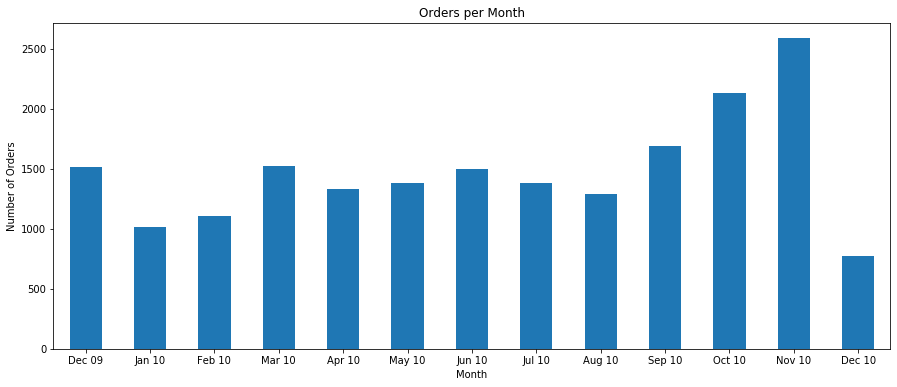

In [174]:
om = ord_month.plot('bar', figsize = (15, 6))
om.set_xlabel('Month')
om.set_ylabel('Number of Orders')
om.set_title('Orders per Month')
om.set_xticklabels(('Dec 09', 'Jan 10', 'Feb 10', 'Mar 10', 'Apr 10', 'May 10', 
                           'Jun 10', 'Jul 10', 'Aug 10', 'Sep 10', 'Oct 10', 'Nov 10', 'Dec 10'), rotation = 'horizontal')
plt.show()                          

In [175]:
# most popular time of the month to order

ord_day = retail.groupby('invoice')['day'].unique().value_counts().sort_index()
ord_day

[1]     708
[2]     696
[3]     610
[4]     595
[5]     661
[6]     572
[7]     812
[8]     827
[9]     689
[10]    609
[11]    655
[12]    576
[13]    512
[14]    634
[15]    732
[16]    617
[17]    600
[18]    687
[19]    603
[20]    506
[21]    649
[22]    636
[23]    574
[24]    602
[25]    667
[26]    672
[27]    518
[28]    671
[29]    615
[30]    457
[31]    251
Name: day, dtype: int64

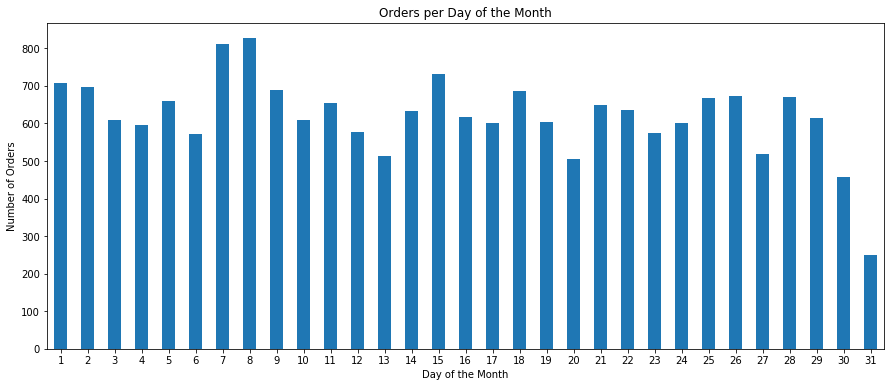

In [180]:
od = ord_day.plot('bar', figsize = (15, 6))
od.set_xlabel('Day of the Month')
od.set_ylabel('Number of Orders')
od.set_title('Orders per Day of the Month')
od.set_xticklabels(labels = [i for i in range (1, 32)], rotation = 'horizontal')
plt.show()                          

In [182]:
# orders per day of the week

ord_dayofweek = retail.groupby('invoice')['day_of_week'].unique().value_counts().sort_index()
ord_dayofweek

[1]    2986
[2]    3514
[3]    3426
[4]    3976
[5]    2615
[6]      30
[7]    2666
Name: day_of_week, dtype: int64

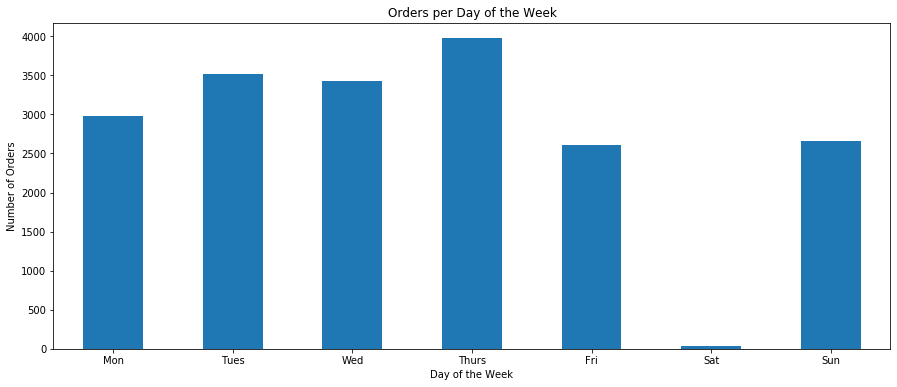

In [184]:
odw = ord_dayofweek.plot('bar', figsize = (15, 6))
odw.set_xlabel('Day of the Week')
odw.set_ylabel('Number of Orders')
odw.set_title('Orders per Day of the Week')
odw.set_xticklabels(labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation = 'horizontal')
plt.show()                          

In [232]:
# orders per hour 

ord_hour = retail.groupby(by = ['invoice'])['hour'].unique().value_counts().sort_index()
ord_hour

[7]       49
[8]      444
[9]     1209
[10]    2232
[11]    2410
[12]    3173
[13]    2891
[14]    2365
[15]    2062
[16]    1264
[17]     637
[18]     258
[19]     185
[20]      34
Name: hour, dtype: int64

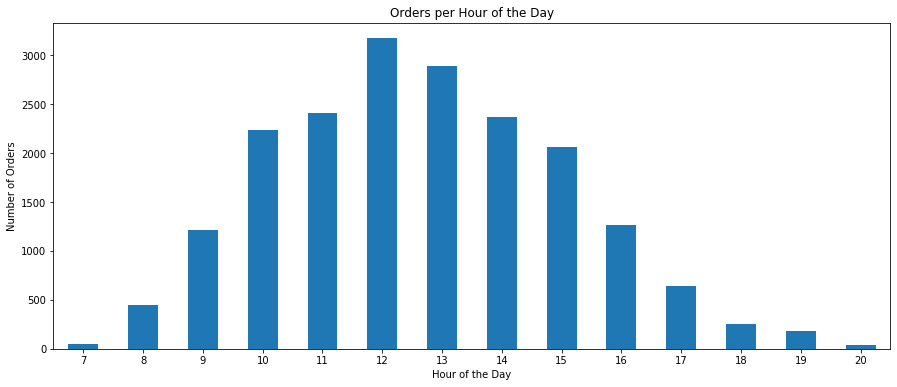

In [193]:
oh = ord_hour.plot('bar', figsize = (15, 6))
oh.set_xlabel('Hour of the Day')
oh.set_ylabel('Number of Orders')
oh.set_title('Orders per Hour of the Day')
oh.set_xticklabels(labels = [i for i in range (7, 21)], rotation = 'horizontal')
plt.show()     

In [106]:
q_item = retail.groupby(by = ['desc'], as_index = False)['quantity'].sum()
q_item.head()

,desc,quantity
0,doormat union jack guns and roses,169
1,3 stripey mice feltcraft,663
2,4 purple flock dinner candles,200
3,animal stickers,385
4,bank charges,2


In [107]:
q_item.sort_values(by = 'quantity', ascending = False).head()

,desc,quantity
4260,white hanging heart t-light holder,56915
4366,world war 2 gliders asstd designs,54754
691,brocade ring purse,48166
2632,pack of 72 retro spot cake cases,45156
262,assorted colour bird ornament,44551


In [108]:
q_item.sort_values(by = 'quantity', ascending = False).tail()

,desc,quantity
2544,opal white/silver flower necklace,1
1789,green chenille shaggy c/cover,1
2337,midnight blue crystal drop earrings,1
3728,"silicon cube 25w, blue",1
1381,"f.fairy s/3 sml candle, lavender",1


In [262]:
item_month = retail.groupby(by = ['desc', 'year_month'], as_index = False)['quantity'].sum()
item_month.sort_values(by = 'quantity', ascending = False).head()

,desc,year_month,quantity
4900,brocade ring purse,201009,13853
27037,set/6 woodland paper plates,201003,13099
27029,set/6 woodland paper cups,201003,13062
27007,set/6 strawberry paper cups,201003,13009
27012,set/6 strawberry paper plates,201003,12504


In [264]:
item_dayofweek = retail.groupby(by = ['desc', 'day_of_week'], as_index = False)['quantity'].sum()
item_dayofweek.sort_values(by = 'quantity', ascending = False).head()

,desc,day_of_week,quantity
3477,brocade ring purse,5,17922
13275,pack of 12 suki tissues,2,17100
22582,world war 2 gliders asstd designs,4,15227
19033,set/6 fruit salad paper cups,1,14289
19027,set/6 fruit salad paper plates,1,14053


In [265]:
item_coun = retail.groupby(by = ['desc', 'country'], as_index = False)['quantity'].sum()
item_coun.sort_values(by = 'quantity', ascending = False).head()

,desc,country,quantity
18168,white hanging heart t-light holder,United Kingdom,51679
18639,world war 2 gliders asstd designs,United Kingdom,51538
2571,brocade ring purse,United Kingdom,48014
1084,assorted colour bird ornament,United Kingdom,41529
10712,pack of 72 retro spot cake cases,United Kingdom,35347


In [208]:
retail_sort = retail.sort_values(['cust_id', 'stock_code', 'date'])
retail_sort_shift1 = retail_sort.shift(1)
retail_sort_reorder = retail_sort.copy()

retail_sort_reorder['reorder'] = np.where(retail_sort['stock_code'] == retail_sort_shift1['stock_code'], 1, 0)
retail_sort_reorder.head()

,invoice,country,cust_id,stock_code,desc,quantity,unit_price,date,spent,year_month,year,month,day,day_of_week,hour,reorder
107803,499763,United Kingdom,12346.0,15056BL,edwardian parasol black,1,5.95,2010-03-02 13:08:00,5.95,201003,2010,3,2,2,13,0
107802,499763,United Kingdom,12346.0,15056N,edwardian parasol natural,1,5.95,2010-03-02 13:08:00,5.95,201003,2010,3,2,2,13,0
107804,499763,United Kingdom,12346.0,15056P,edwardian parasol pink,1,5.95,2010-03-02 13:08:00,5.95,201003,2010,3,2,2,13,0
107801,499763,United Kingdom,12346.0,20679,edwardian parasol red,1,5.95,2010-03-02 13:08:00,5.95,201003,2010,3,2,2,13,0
107800,499763,United Kingdom,12346.0,20682,red spotty childs umbrella,1,3.25,2010-03-02 13:08:00,3.25,201003,2010,3,2,2,13,0


In [219]:
rsr = pd.DataFrame((retail_sort_reorder.groupby('desc')['reorder'].sum())).sort_values('reorder', ascending = False)
rsr.head()

,reorder
desc,
white hanging heart t-light holder,2012
regency cakestand 3 tier,887
strawberry ceramic trinket box,852
jumbo bag red retrospot,788
assorted colour bird ornament,742


In [250]:
q_up = retail.groupby(by = ['unit_price'], as_index = False)['quantity'].sum()
q_up.sort_values('quantity', ascending = False).head(10)

,unit_price,quantity
75,1.25,545507
35,0.42,503302
58,0.85,427047
94,1.65,411840
83,1.45,233113
128,2.55,225105
139,2.95,196894
67,1.06,184384
111,2.10,182338
42,0.55,170941


In [248]:
up_arr = np.array(retail.unit_price)
q_arr = np.array(retail.quantity)

np.corrcoef(up_arr, q_arr)

array([[ 1.        , -0.00716785],
       [-0.00716785,  1.        ]])

In [109]:
ord_coun = retail.groupby(['country'])['invoice'].count().sort_values()
ord_coun.head()

country
Nigeria        30
Bahrain        42
Korea          53
West Indies    54
Brazil         62
Name: invoice, dtype: int64

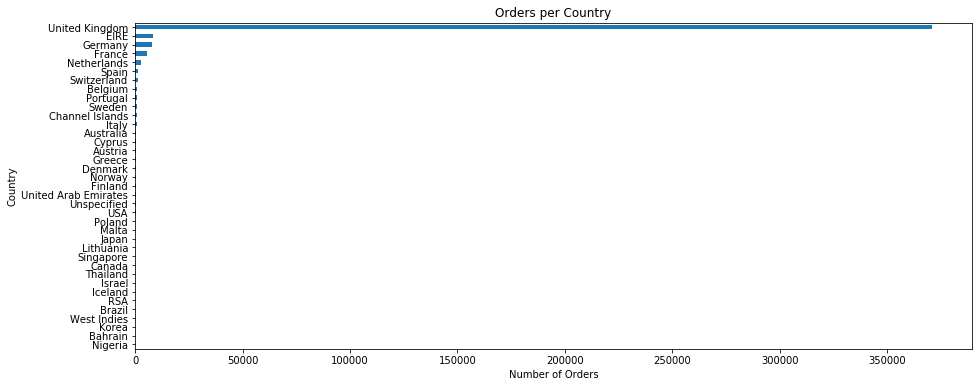

In [110]:
ocoun = ord_coun.plot('barh', figsize = (15, 6))
ocoun.set_xlabel('Number of Orders')
ocoun.set_ylabel('Country')
ocoun.set_title('Orders per Country')
plt.show()     

In [111]:
del ord_coun['United Kingdom']

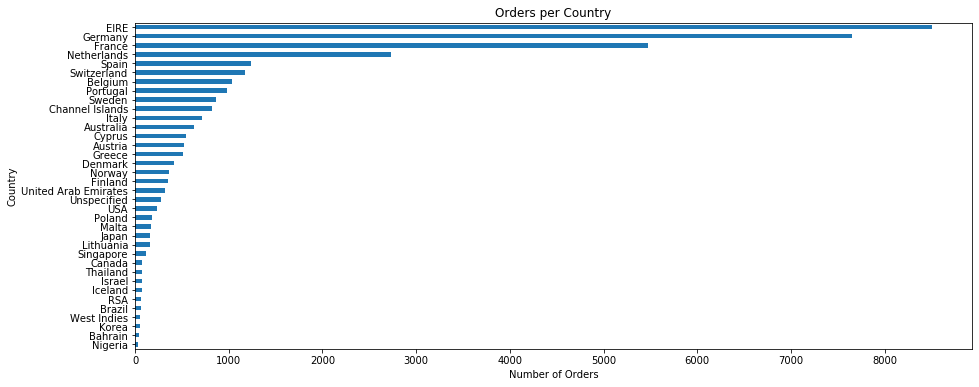

In [112]:
ocoun2 = ord_coun.plot('barh', figsize = (15, 6))
ocoun2.set_xlabel('Number of Orders')
ocoun2.set_ylabel('Country')
ocoun2.set_title('Orders per Country')
plt.show() 

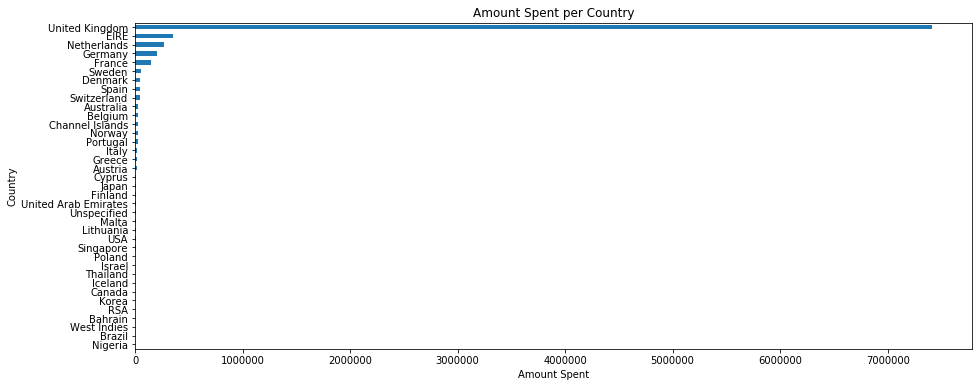

In [279]:
coun_spent = retail.groupby('country')['spent'].sum().sort_values()

cs = coun_spent.plot('barh', figsize = (15, 6))
cs.set_xlabel('Amount Spent')
cs.set_ylabel('Country')
cs.set_title('Amount Spent per Country')
plt.show() 

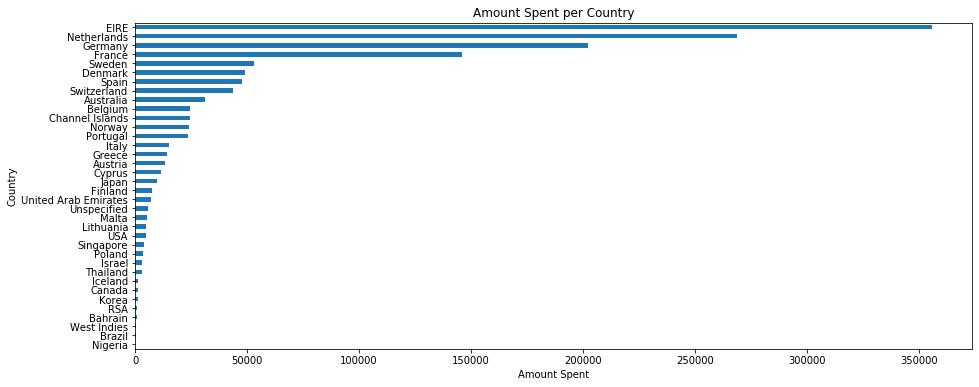

In [280]:
del coun_spent['United Kingdom']

cs2 = coun_spent.plot('barh', figsize = (15, 6))
cs2.set_xlabel('Amount Spent')
cs2.set_ylabel('Country')
cs2.set_title('Amount Spent per Country')
plt.show() 